In [2]:
#Import libraries
os.chdir("/home/robbe/ionbot/Fragpipe_results")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

Pseudo:

for each file in project:

    make sets for ionbot en fragpipe (en pfind)

    bereken union en intersection

    tel iedere union en iedere intersection op bij elkaar
    
    steek dit in venn diagram

In [13]:
f022545 = pd.read_csv("/home/robbe/ionbot/Fragpipe_results/PXD022545withquant/PXD022545quant.tsv", sep="\t")

In [14]:
f022545["Spectrum File"].unique()

array(['C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_1\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_2\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_3\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_1\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_2\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_3\\interact.pep.xml'],
      dtype=object)

In [15]:
fragpipe_list = f022545.groupby(["Peptide", "Spectrum File"])["Spectrum"].count().reset_index()

In [16]:
FControl1 = fragpipe_list[fragpipe_list['Spectrum File'].str.contains("Control_1")]
FControl2 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("Control_2")]
FControl3 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("Control_3")]
FTreatment1 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_1")]
FTreatment2 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_2")]
FTreatment3 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_3")]
Fragpipesubs = [FControl1, FControl2, FControl3, FTreatment1, FTreatment2, FTreatment3]

In [17]:
FControl1

,Peptide,Spectrum File,Spectrum
0,AAAAAAAAAAK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,2
5,AAAAAAAAAPAAAATAPTTAATTAATAAQ,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
8,AAAAAAAGDSDSWDADAFSVEDPVRK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
10,AAAAAAALQAK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
15,AAAAAEQQQFYLLLGNLLSPDNVVR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
...,...,...,...
72133,YYHLTHDELISLLLQR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
72149,YYTSASGDEMVSLK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,3
72155,YYTVFDR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,2
72160,YYTVFDRDNNR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1


In [18]:
ionbot = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD022545/PXD022545_first.csv")
ionbot.head()

,Unnamed: 0,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0,0_8_1,controllerType=0 controllerNumber=1 scan=10,10,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,790.34769,790.34568,0.88133,2,EAADTER,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
1,1,0_7572_1,controllerType=0 controllerNumber=1 scan=10006,10006,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1911.78352,1911.78054,1163.81700,4,SEEAHAEDSVMDHHFR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
2,2,0_7573_4,controllerType=0 controllerNumber=1 scan=10007,10007,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,762.36667,762.36603,1163.86404,2,GTFPDAR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
3,3,0_7574_2,controllerType=0 controllerNumber=1 scan=10008,10008,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,939.45005,939.44836,1163.91264,2,VMEYINR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
4,4,0_7575_1,controllerType=0 controllerNumber=1 scan=10010,10010,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,895.40507,895.40354,1164.25452,2,ESFDGSVR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First


In [19]:
i = ionbot.groupby(["matched_peptide", "spectrum_file"])["ionbot_match_id"].count().reset_index()
i.head()

,matched_peptide,spectrum_file,ionbot_match_id
0,AAAAAAAAAVSR,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
1,AAAAAAAGDSDSWDADAFSVEDPVRK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
2,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
3,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
4,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1


In [20]:
iControl1 = i[i["spectrum_file"].str.contains("CTRL_01")]
iControl2 = i[i['spectrum_file'].str.contains("CTRL_02")]
iControl3 = i[i['spectrum_file'].str.contains("CTRL_03")]
iTreatment1 = i[i["spectrum_file"].str.contains("H2O2_01")]
iTreatment2 = i[i["spectrum_file"].str.contains("H2O2_02")]
iTreatment3 = i[i["spectrum_file"].str.contains("H2O2_03")]
ionbotsubs = [iControl1, iControl2, iControl3, iTreatment1, iTreatment2, iTreatment3]

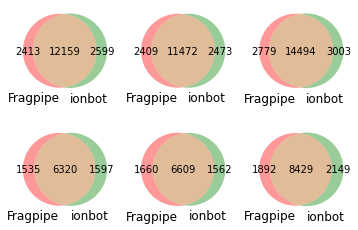

In [21]:
from matplotlib_venn import venn2

Tot = 6
Cols = 3
# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)
fig = plt.figure(1)
for k in range(Tot):

    ax = fig.add_subplot(Rows,Cols,Position[k])
       # Or whatever you want in the subplot

    fragpipesub = Fragpipesubs[k]
    ionbotsub = ionbotsubs[k]
    fragpipeset = set(fragpipesub["Peptide"])
    ionbotset = set(ionbotsub["matched_peptide"])
    venn2([fragpipeset, ionbotset], ('Fragpipe', 'ionbot'))
plt.show()
    

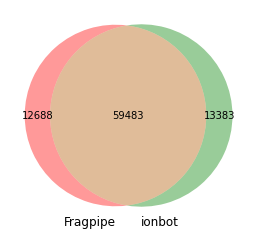

In [22]:
venn2(subsets = ((2413+2409+2779+1535+1660+1892),(2599+2473+3003+1597+1562+2149), (12159+11472+14494+6320+6609+8429)), set_labels = ('Fragpipe', 'ionbot'))

Comparison at unique peptide sequence level

## MSFragger Fingerprint

To do:
- Sum the masses from the assigned modifications to the delta masses because those aren't accounted for
- Round delta masses up to two decimals
- Split Treatment and controls
- Take median intensities for each peptidoform
- Sum those for each mass shift
- Plot?

In [23]:
f022545.columns

Index(['Spectrum', 'Spectrum File', 'Peptide', 'Modified Peptide', 'Prev AA',
       'Next AA', 'Peptide Length', 'Charge', 'Retention', 'Observed Mass',
       'Calibrated Observed Mass', 'Observed M/Z', 'Calibrated Observed M/Z',
       'Calculated Peptide Mass', 'Calculated M/Z', 'Delta Mass',
       'Expectation', 'Hyperscore', 'Nextscore', 'PeptideProphet Probability',
       'Number of Enzymatic Termini', 'Number of Missed Cleavages',
       'Protein Start', 'Protein End', 'Intensity', 'Assigned Modifications',
       'Observed Modifications', 'MSFragger Localization',
       'Best Score with Delta Mass', 'Best Score without Delta Mass',
       'Is Unique', 'Protein', 'Protein ID', 'Entry Name', 'Gene',
       'Protein Description', 'Mapped Genes', 'Mapped Proteins'],
      dtype='object')

In [24]:
f022545["Delta Mass"]

0         -0.0001
1         -0.0007
2          0.0000
3          0.0000
4          0.0000
           ...   
119980     2.0075
119981   -70.0371
119982    -0.0009
119983     1.0014
119984     1.0017
Name: Delta Mass, Length: 119985, dtype: float64

In [28]:
f022545.columns

Index(['Spectrum', 'Spectrum File', 'Peptide', 'Modified Peptide', 'Prev AA',
       'Next AA', 'Peptide Length', 'Charge', 'Retention', 'Observed Mass',
       'Calibrated Observed Mass', 'Observed M/Z', 'Calibrated Observed M/Z',
       'Calculated Peptide Mass', 'Calculated M/Z', 'Delta Mass',
       'Expectation', 'Hyperscore', 'Nextscore', 'PeptideProphet Probability',
       'Number of Enzymatic Termini', 'Number of Missed Cleavages',
       'Protein Start', 'Protein End', 'Intensity', 'Assigned Modifications',
       'Observed Modifications', 'MSFragger Localization',
       'Best Score with Delta Mass', 'Best Score without Delta Mass',
       'Is Unique', 'Protein', 'Protein ID', 'Entry Name', 'Gene',
       'Protein Description', 'Mapped Genes', 'Mapped Proteins'],
      dtype='object')

In [31]:
f022545.filter(["Peptide", "Modified Peptide", "Assigned Modifications", "Observed Modifications", "Delta Mass"])

,Peptide,Modified Peptide,Assigned Modifications,Observed Modifications,Delta Mass
0,ASSHSSQTQGGGSVTK,NaN,NaN,NaN,-0.0001
1,GGSGGSYGR,NaN,NaN,NaN,-0.0007
2,HESGASIK,NaN,NaN,NaN,0.0000
3,ASEEHLK,NaN,NaN,NaN,0.0000
4,ASSHSSQTQGGGSVTK,NaN,NaN,NaN,0.0000
...,...,...,...,...,...
119980,LLQDSVDFSLADAINTEFK,NaN,NaN,"Mod1: Second isotopic peak (PeakApex: 2.0044, ...",2.0075
119981,ISHSTVATEISGYNGATGTSHLHVFWQASGGVTEPGSSGSPIYSPEK,NaN,NaN,"Mod1: First isotopic peak, Mod2: Deletion of A...",-70.0371
119982,LLQDSVDFSLADAINTEFK,NaN,NaN,NaN,-0.0009
119983,LLQDSVDFSLADAINTEFK,NaN,NaN,"Mod1: First isotopic peak (PeakApex: 1.0032, T...",1.0014


In [46]:
f022545["Delta Mass"] = f022545["Delta Mass"].round(2)

In [58]:
g = f022545.groupby(["Peptide","Modified Peptide", "Assigned Modifications", "Observed Modifications", "Delta Mass"])["Spectrum File"].count().reset_index()

In [59]:
g

,Peptide,Modified Peptide,Assigned Modifications,Observed Modifications,Delta Mass,Spectrum File
0,AAAAAAAGDSDSWDADAFSVEDPVRK,n[43]AAAAAAAGDSDSWDADAFSVEDPVRK,N-term(42.0106),"Mod1: First isotopic peak, Mod2: monomethylati...",19.03,1
1,AAAAAEQQQFYLLLGNLLSPDNVVR,n[43]AAAAAEQQQFYLLLGNLLSPDNVVR,N-term(42.0106),Mod1: 13C(2) 15N(2) (Theoretical: 4.0008); Mod...,4.01,1
2,AAAAAEQQQFYLLLGNLLSPDNVVR,n[43]AAAAAEQQQFYLLLGNLLSPDNVVR,N-term(42.0106),"Mod1: First isotopic peak (PeakApex: 1.0032, T...",1.00,1
3,AAAAVVEFQR,n[43]AAAAVVEFQR,N-term(42.0106),"Mod1: First isotopic peak (PeakApex: 1.0032, T...",1.01,1
4,AAAFVTSPPLSPDPTTPDFLNSLLSCGDLQVTGSAHCTFNTAQK,AAAFVTSPPLSPDPTTPDFLNSLLSCGDLQVTGSAHCTFNTAQK,"26C(57.0214), 37C(57.0214)","Mod1: First isotopic peak, Mod2: Unannotated m...",-115.06,2
...,...,...,...,...,...,...
7184,YWPTEPGEYAVHVICDDEDIRDSPFIAHILPAPPDCFPDK,YWPTEPGEYAVHVICDDEDIRDSPFIAHILPAPPDCFPDK,"15C(57.0214), 36C(57.0214)",Mod1: Unannotated mass-shift -116.0588 (PeakAp...,-116.06,2
7185,YWQQVIDMNDYQR,YWQQVIDM[147]NDYQR,8M(15.9949),"Mod1: First isotopic peak (PeakApex: 1.0032, T...",1.00,2
7186,YYDVMSDEEIER,YYDVM[147]SDEEIER,5M(15.9949),"Mod1: First isotopic peak (PeakApex: 1.0032, T...",1.00,1
7187,YYSSEYHYVGGFYGGCNEALMK,YYSSEYHYVGGFYGGCNEALM[147]K,"16C(57.0214), 21M(15.9949)","Mod1: Deamidation (PeakApex: 0.9840, Theoretic...",0.98,1
